In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib notebook
#pd.set_option('display.max_rows',500)

In [42]:
#plt.style.available

In [3]:
cvd = pd.read_csv('covid-19/covid_19_india.csv')
cvd.columns = ['Sno','Date','Time','State','CIN','CFN','Cured','Deaths','Confirmed']
cvd = cvd[ cvd['State'] == 'Madhya Pradesh']
cvd.drop(['Sno','CIN','CFN','State','Time'], axis=1,inplace=True)
cvd['Date'] = pd.to_datetime(cvd['Date'])
cvd = cvd.replace('-',np.NaN)
cvd = cvd.set_index('Date').sort_index()
cvd

,Cured,Deaths,Confirmed
Date,,,
2020-01-04,0,3,66
2020-01-05,482,137,2719
2020-01-06,4842,350,8089
2020-01-07,10395,572,13593
2020-01-08,22271,867,31806
...,...,...,...
2020-12-04,0,36,564
2020-12-05,1747,221,3785
2020-12-06,7042,431,10241


In [9]:
td = pd.read_csv('covid-19/StatewiseTestingDetails.csv')
td = td[ td['State'] == 'Madhya Pradesh']
td.drop('State',axis=1,inplace=True)
td['PositivityRate'] = (td['Positive'] / td['TotalSamples'] )*100
td = td.set_index('Date').sort_index()
td

,TotalSamples,Negative,Positive,PositivityRate
Date,,,,
2020-04-05,2812.0,1954,193.0,6.863442
2020-04-07,3770.0,3125,290.0,7.692308
2020-04-08,4056.0,3443,341.0,8.407298
2020-04-09,5135.0,3989,411.0,8.003895
2020-04-10,7049.0,4840,451.0,6.398071
...,...,...,...,...
2020-08-23,1181280.0,1123872,NaN,NaN
2020-08-24,1203705.0,1145005,NaN,NaN
2020-08-25,1226559.0,1166480,NaN,NaN


In [51]:
plotdf = pd.merge(cvd,td,how='inner',left_index=True,right_index=True)
plotdf.reset_index()

,Date,Cured,Deaths,Confirmed,TotalSamples,Negative,Positive,PositivityRate
0,2020-04-05,798,165,2942,2812.0,1954,193.0,6.863442
1,2020-04-07,11049,593,14297,3770.0,3125,290.0,7.692308
2,2020-04-08,24099,900,34285,4056.0,3443,341.0,8.407298
3,2020-04-13,44,43,604,10481.0,6875,614.0,5.858220
4,2020-04-14,51,50,730,8105.0,7103,741.0,9.142505
...,...,...,...,...,...,...,...,...
107,2020-08-23,39399,1206,51866,1181280.0,1123872,NaN,NaN
108,2020-08-24,40390,1229,53129,1203705.0,1145005,NaN,NaN
109,2020-08-25,41231,1246,54421,1226559.0,1166480,NaN,NaN
110,2020-08-26,42310,1265,55800,1248021.0,1186878,NaN,NaN


<IPython.core.display.Javascript object>


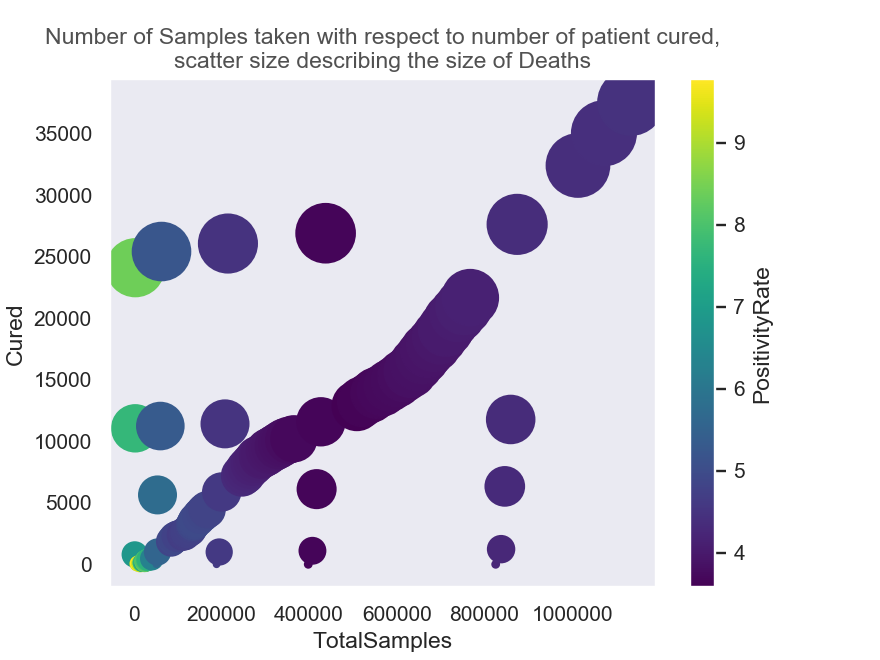

In [87]:
sbn.set_style('white')
sbn.set()
ax = plotdf.plot.scatter('TotalSamples','Cured',c='PositivityRate',s=plotdf['Deaths'], colormap='viridis')
ax.set_title('Number of Samples taken with respect to number of patient cured,\nscatter size describing the size of Deaths',alpha=0.8);
ax.grid(False)

<IPython.core.display.Javascript object>


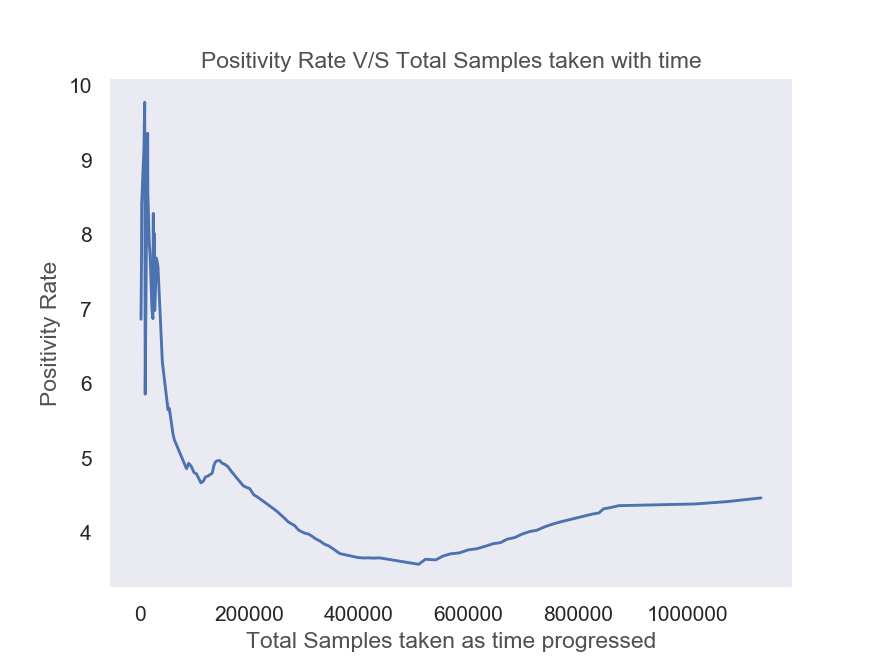

In [79]:
plt.figure()

sbn.set(style='dark')
ax = sbn.lineplot('TotalSamples','PositivityRate',data=plotdf)
ax.set_ylabel('Positivity Rate',alpha=0.8)
ax.set_xlabel('Total Samples taken as time progressed',alpha=0.8)
ax.set_title('Positivity Rate V/S Total Samples taken with time',alpha=0.8);
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both',which='both',left=False,bottom=False)

<IPython.core.display.Javascript object>


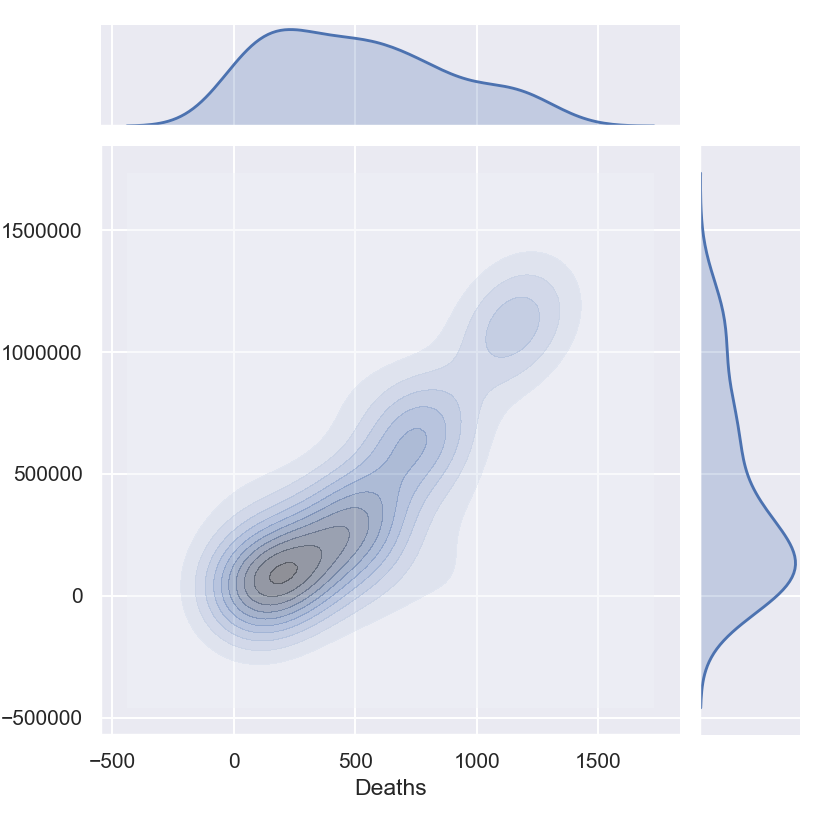

In [8]:
#plt.figure()
sbn.jointplot('Deaths','TotalSamples',data=plotdf,alpha=0.4,kind='kde');